In [1]:
import numpy as np
import pandas as pd

In [2]:
raw_data = pd.read_csv('Data/2.02. Binary predictors.csv')

In [3]:
data = raw_data.copy()
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data

,SAT,Admitted,Gender
0,1363,0,1
1,1792,1,0
2,1954,1,0
3,1653,0,1
4,1593,0,1
...,...,...,...
163,1722,1,0
164,1750,1,1
165,1555,0,1
166,1524,0,1


In [4]:
x = data[['SAT','Gender']]
y = data['Admitted']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=100)

In [7]:
from sklearn.svm import SVC
model = SVC()

In [8]:
model.fit(x_train,y_train)

SVC()

In [9]:
pred = model.predict(x_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[19  1]
 [ 3 28]]


              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.97      0.90      0.93        31

    accuracy                           0.92        51
   macro avg       0.91      0.93      0.92        51
weighted avg       0.93      0.92      0.92        51



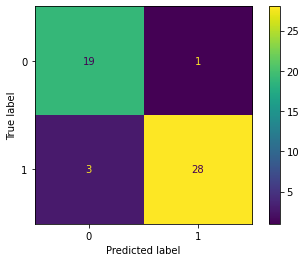

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = model.classes_)
disp.plot()

In [12]:
## Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 1/5] END .............................C=0.1, gamma=0.001; total time=   0.0s
[CV 2/5] END .............................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001]},
             verbose=3)

In [13]:
grid.best_params_

{'C': 1, 'gamma': 0.001}

In [14]:
grid.best_estimator_

SVC(C=1, gamma=0.001)

In [15]:
grid_pred = grid.predict(x_test)

In [16]:
print(confusion_matrix(y_test,grid_pred))
print('\n')
print(classification_report(y_test,grid_pred))

[[20  0]
 [ 5 26]]


              precision    recall  f1-score   support

           0       0.80      1.00      0.89        20
           1       1.00      0.84      0.91        31

    accuracy                           0.90        51
   macro avg       0.90      0.92      0.90        51
weighted avg       0.92      0.90      0.90        51



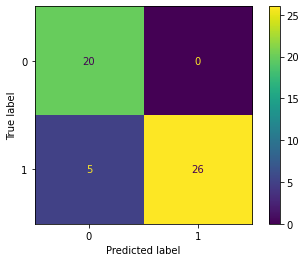

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, grid_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = model.classes_)
disp.plot()

### Cross Validation

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(x)

StandardScaler()

In [21]:
x_scaled = scaler.transform(x)

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.3, random_state=100)

In [23]:
model1 = SVC()

In [24]:
model1.fit(x_train,y_train)

SVC()

In [25]:
pre = model1.predict(x_test)

In [26]:
print(confusion_matrix(y_test,pre))
print('\n')
print(classification_report(y_test,pre))

[[19  1]
 [ 3 28]]


              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.97      0.90      0.93        31

    accuracy                           0.92        51
   macro avg       0.91      0.93      0.92        51
weighted avg       0.93      0.92      0.92        51



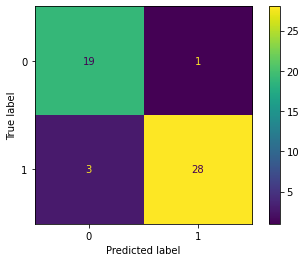

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred, labels= model1.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = model1.classes_)
disp.plot()

In [27]:
## Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 1/5] END .............................C=0.1, gamma=0.001; total time=   0.0s
[CV 2/5] END .............................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001]},
             verbose=3)

In [28]:
gd_pre = grid.predict(x_test)

In [29]:
print(confusion_matrix(y_test,gd_pre))
print('\n')
print(classification_report(y_test,gd_pre))

[[19  1]
 [ 1 30]]


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.97      0.97      0.97        31

    accuracy                           0.96        51
   macro avg       0.96      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51



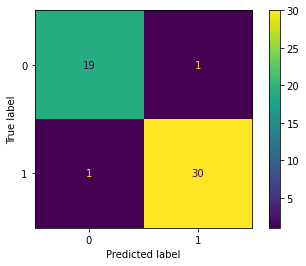

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, gd_pre, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = model.classes_)
disp.plot()